# Current population - Population by nationality and federal states

https://www.destatis.de/EN/Themes/Society-Environment/Population/Current-Population/Tables/population-by-laender.html

# Import Libraries

In [1]:
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

import warnings
import requests
from bs4 import BeautifulSoup

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['figure.figsize'] = [12, 9]
plt.rcParams['font.size'] = 10
path = os.getcwd()                                         # get current working directory
warnings.simplefilter('ignore')

# Fetch Data

In [3]:
url = 'https://www.destatis.de/EN/Themes/Society-Environment/Population/Current-Population/Tables/population-by-laender.html'

r = requests.get(url)

print(f"Status Code: {r.status_code} -- Content-Type: {r.headers['Content-Type']} -- Encoding: {r.encoding}")

Status Code: 200 -- Content-Type: text/html;charset=utf-8 -- Encoding: utf-8


# Parse HTML Document

In [4]:
soup = BeautifulSoup(r.text, 'html.parser')

# Navigate The Data Structure

In [5]:
tbody = soup.find('tbody')
trs = tbody.find_all('tr')

land = []
total = []
germans = []
foreigners = []
foreigners_pct = []
eustates = []
eustates_pct = []


for td in trs:
  land.append(td.findAll('td')[0].string)
  total.append(td.findAll('td')[1].string)
  germans.append(td.findAll('td')[2].string)
  foreigners.append(td.findAll('td')[3].string)
  foreigners_pct.append(td.findAll('td')[4].string)
  eustates.append(td.findAll('td')[5].string)
  eustates_pct.append(td.findAll('td')[6].string)

# Create DataFrame

In [6]:
data = {
    'Land': land,
    'Total': total,
    'Germans': germans,
    'Foreigners': foreigners,
    'Foreigners (%)': foreigners_pct,
    'IncludingEUStates': eustates,
    'IncludingEUStates (%)': eustates_pct
}

df = pd.DataFrame(data=data)

# Head and Tail

In [7]:
df

,Land,Total,Germans,Foreigners,Foreigners (%),IncludingEUStates,IncludingEUStates (%)
0,Germany,"83,237,124","72,344,071","10,893,053",13.1,"4,523,100",41.5
1,Baden-Württemberg,"11,124,642","9,302,795","1,821,847",16.4,"880,098",48.3
2,Bayern,"13,176,989","11,319,986","1,857,003",14.1,"912,247",49.1
3,Berlin,"3,677,472","2,935,441","742,031",20.2,"240,222",32.4
4,Brandenburg,"2,537,868","2,399,041","138,827",5.5,"51,542",37.1
5,Bremen,"676,463","545,750","130,713",19.3,"38,178",29.2
6,Hamburg,"1,853,935","1,534,008","319,927",17.3,"104,330",32.6
7,Hessen,"6,295,017","5,216,001","1,079,016",17.1,"445,920",41.3
8,Mecklenburg-Vorpommern,"1,611,160","1,530,288","80,872",5.0,"31,977",39.5
9,Niedersachsen,"8,027,031","7,203,533","823,498",10.3,"332,521",40.4


In [8]:
df.shape

(17, 7)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17 entries, 0 to 16
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Land                   17 non-null     object
 1   Total                  17 non-null     object
 2   Germans                17 non-null     object
 3   Foreigners             17 non-null     object
 4   Foreigners (%)         17 non-null     object
 5   IncludingEUStates      17 non-null     object
 6   IncludingEUStates (%)  17 non-null     object
dtypes: object(7)
memory usage: 1.1+ KB


In [10]:
df = df.applymap(lambda x: str.strip(x).replace(',', ''))                     # strip all commas from dataframe
df.head()

,Land,Total,Germans,Foreigners,Foreigners (%),IncludingEUStates,IncludingEUStates (%)
0,Germany,83237124,72344071,10893053,13.1,4523100,41.5
1,Baden-Württemberg,11124642,9302795,1821847,16.4,880098,48.3
2,Bayern,13176989,11319986,1857003,14.1,912247,49.1
3,Berlin,3677472,2935441,742031,20.2,240222,32.4
4,Brandenburg,2537868,2399041,138827,5.5,51542,37.1


In [11]:
# change data type
df = df.astype(
  {
    'Total': np.int64,
    'Germans': np.int64,
    'Foreigners': np.int64,
    'Foreigners (%)': np.float64,
    'IncludingEUStates': np.int64,
    'IncludingEUStates (%)': np.float64
  }
)

df.dtypes

Land                      object
Total                      int64
Germans                    int64
Foreigners                 int64
Foreigners (%)           float64
IncludingEUStates          int64
IncludingEUStates (%)    float64
dtype: object

In [12]:
df.describe(include='object')

,Land
count,17
unique,17
top,Germany
freq,1


In [13]:
df['Land'].value_counts()

Germany                   1
Niedersachsen             1
Schleswig-Holstein        1
Sachsen-Anhalt            1
Sachsen                   1
Saarland                  1
Rheinland-Pfalz           1
Nordrhein-Westfalen       1
Mecklenburg-Vorpommern    1
Baden-Württemberg         1
Hessen                    1
Hamburg                   1
Bremen                    1
Brandenburg               1
Berlin                    1
Bayern                    1
Thüringen                 1
Name: Land, dtype: int64

# Kernel density estimation

In [14]:
# Kernel density estimation helper function
def plot_kde(dataframe, colname: str):
    return sns.kdeplot(data=dataframe[colname])

In [15]:
df.drop(columns=['Foreigners (%)', 'IncludingEUStates (%)']).describe(exclude='object')

,Total,Germans,Foreigners,IncludingEUStates
count,1.700000e+01,1.700000e+01,1.700000e+01,1.700000e+01
mean,9.792603e+06,8.511067e+06,1.281536e+06,5.321294e+05
std,1.952445e+07,1.694757e+07,2.585012e+06,1.078127e+06
min,6.764630e+05,5.457500e+05,8.087200e+04,3.197700e+04
25%,2.108863e+06,1.985717e+06,1.307130e+05,5.154200e+04
50%,3.677472e+06,2.935441e+06,3.199270e+05,1.043300e+05
75%,8.027031e+06,7.203533e+06,1.079016e+06,4.459200e+05
max,8.323712e+07,7.234407e+07,1.089305e+07,4.523100e+06


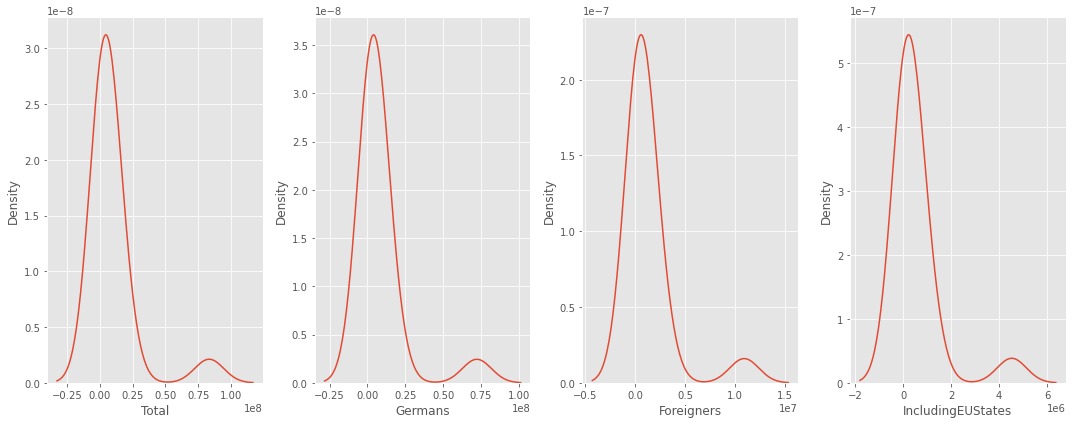

In [16]:
cols_numbers = ['Total', 'Germans',	'Foreigners',	'IncludingEUStates']

plt.figure(figsize=(15, 6))
for i in range(4):
    plt.subplot(1, 4, i+1)
    data = df[cols_numbers]
    plot_kde(dataframe=df, colname=cols_numbers[i])

In [17]:
df[['Foreigners (%)', 'IncludingEUStates (%)']].describe()

,Foreigners (%),IncludingEUStates (%)
count,17.000000,17.000000
mean,11.947059,38.788235
std,5.160562,5.688902
min,5.000000,29.200000
25%,5.800000,35.600000
50%,12.300000,37.800000
75%,16.400000,41.500000
max,20.200000,49.100000


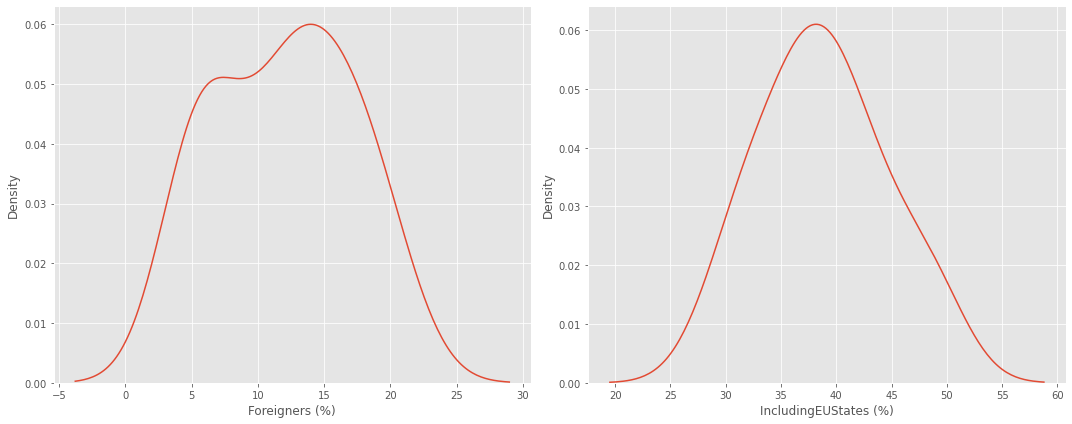

In [18]:
cols_pct = ['Foreigners (%)', 'IncludingEUStates (%)']

plt.figure(figsize=(15, 6))
for i in range(2):
    plt.subplot(1, 2, i+1)
    data = df[cols_pct]
    plot_kde(dataframe=df, colname=cols_pct[i])

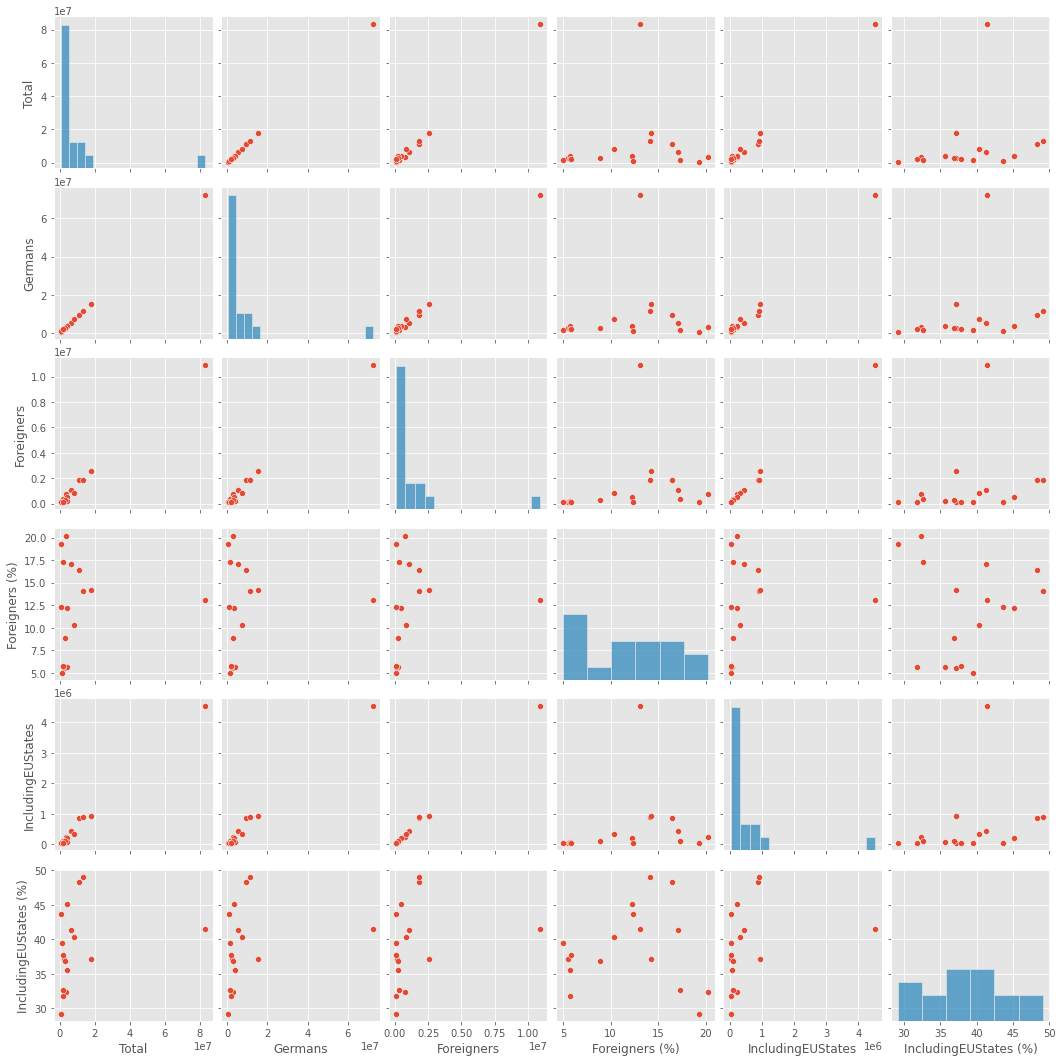

In [19]:
sns.pairplot(data=df, kind='scatter')

In [20]:
from matplotlib.ticker import FuncFormatter

# helper function to format x-axis
def million(x, pos):
  return '%1.1fM' % (x * 1e-6)

format_mill = FuncFormatter(million)


def percentage(x, pos):
  return '%1.1f' % (x * 1)

format_pct = FuncFormatter(percentage)

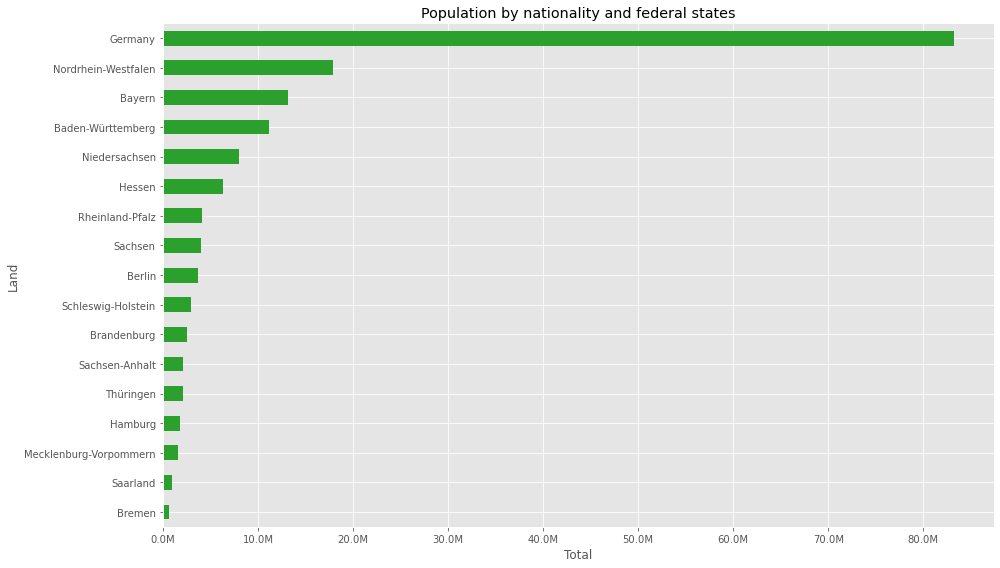

In [21]:
ax = df.set_index('Land')['Total'].sort_values(ascending=True)\
  .plot(kind='barh', color='#2ca02c', figsize=(14, 8))

ax.set(title='Population by nationality and federal states', xlabel='Total', ylabel='Land')
ax.xaxis.set_major_formatter(format_mill)

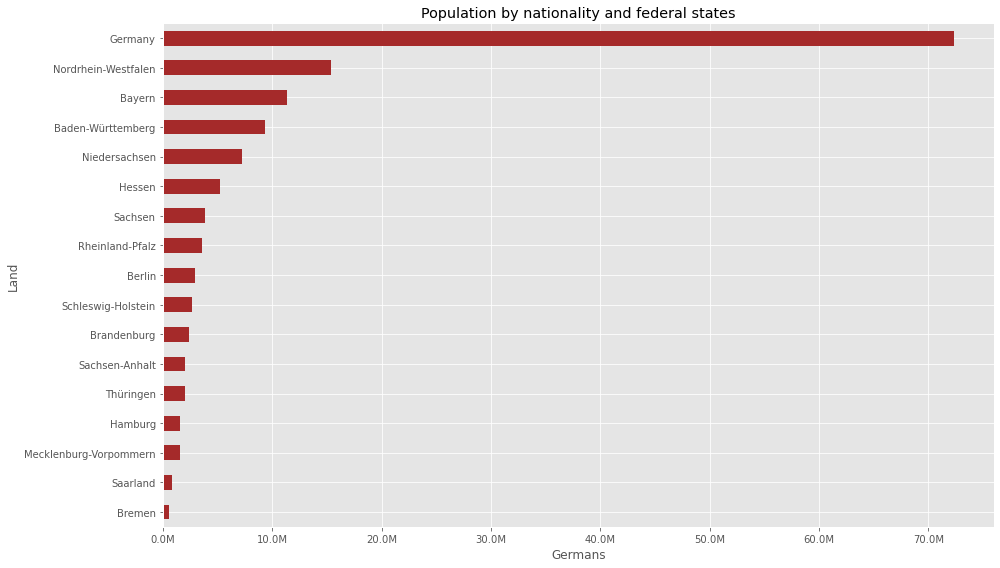

In [22]:
ax1 = df.set_index('Land')['Germans'].sort_values(ascending=True)\
  .plot(kind='barh', color='brown', figsize=(14, 8))

ax1.set(title='Population by nationality and federal states', xlabel='Germans', ylabel='Land')
ax1.xaxis.set_major_formatter(format_mill)

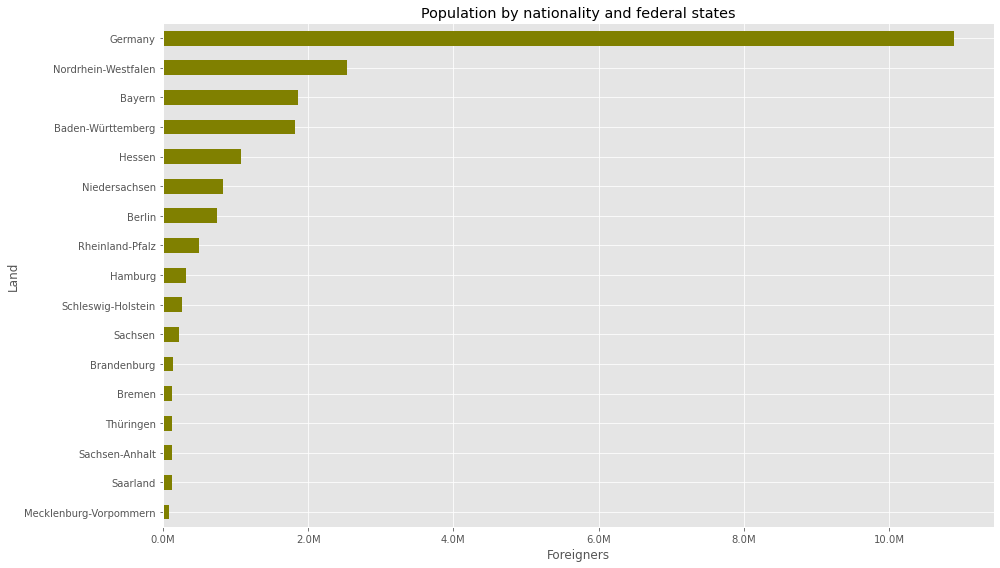

In [23]:
ax2 = df.set_index('Land')['Foreigners'].sort_values(ascending=True)\
  .plot(kind='barh', color='olive', figsize=(14, 8))

ax2.set(title='Population by nationality and federal states', xlabel='Foreigners', ylabel='Land')
ax2.xaxis.set_major_formatter(format_mill)

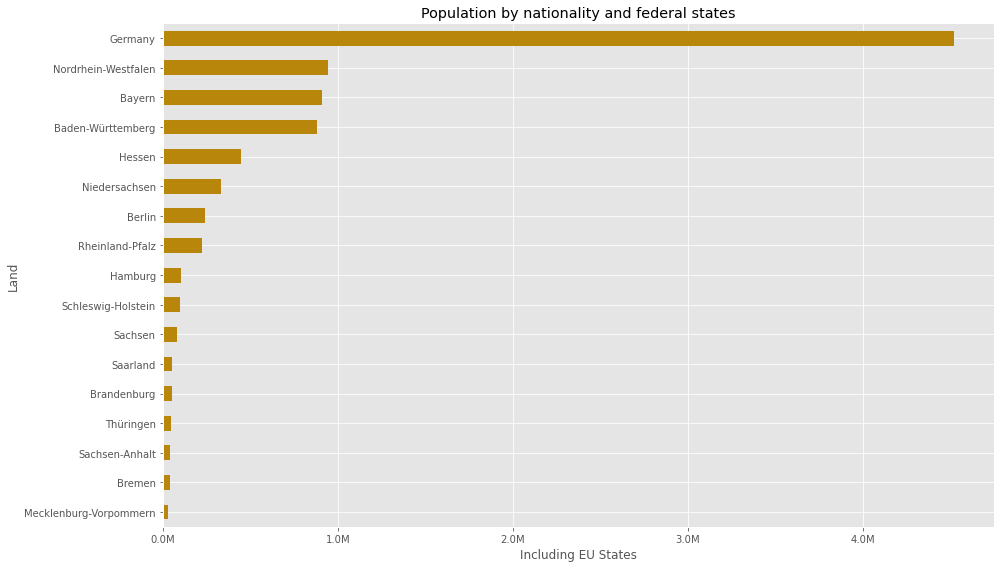

In [24]:
ax3 = df.set_index('Land')['IncludingEUStates'].sort_values(ascending=True)\
  .plot(kind='barh', color='darkgoldenrod', figsize=(14, 8))

ax3.set(title='Population by nationality and federal states', xlabel='Including EU States', ylabel='Land')
ax3.xaxis.set_major_formatter(format_mill)

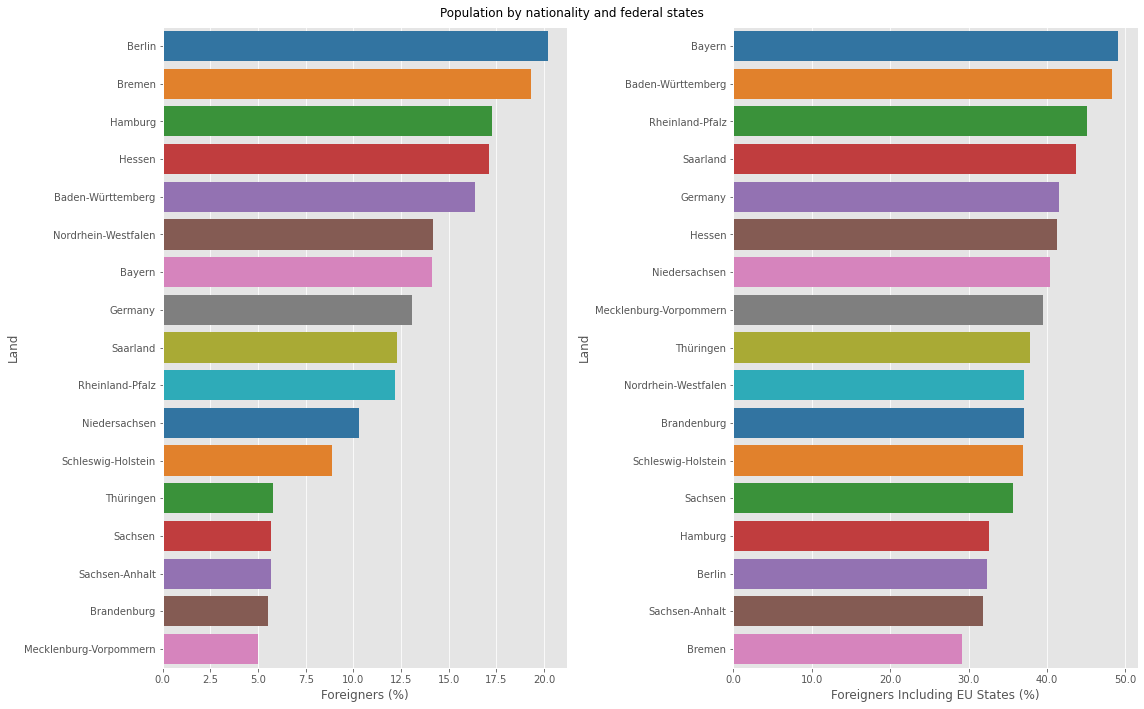

In [25]:
fig, (ax4, ax5) = plt.subplots(1, 2, figsize=(16, 10))
fig.suptitle('Population by nationality and federal states')

sns.barplot(
  data=df.sort_values(by='Foreigners (%)', ascending=False),
  x='Foreigners (%)', y='Land', palette='tab10', ax=ax4
)

ax4.set(xlabel='Foreigners (%)', ylabel='Land')
ax.xaxis.set_major_formatter(percentage)

sns.barplot(
  data=df.sort_values(by='IncludingEUStates (%)', ascending=False),
  x='IncludingEUStates (%)', y='Land', palette='tab10', ax=ax5
)

ax5.set(xlabel='Foreigners Including EU States (%)', ylabel='Land')
ax5.xaxis.set_major_formatter(format_pct)